# Lab2 - Concrete compressive strength regression
Author: Rahian Islam

## Workflow overview

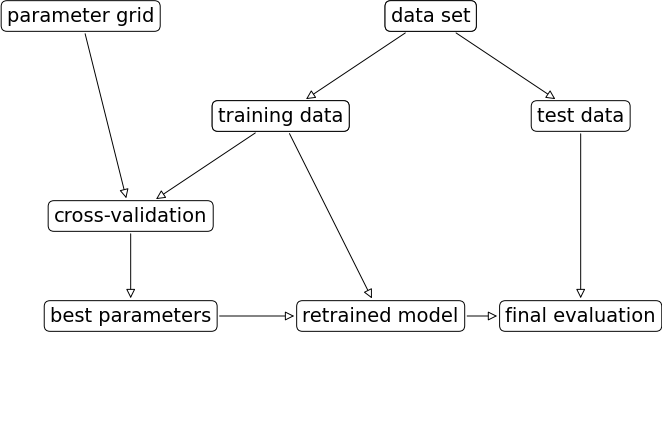

In [2]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances. 

In scikit-learn, only *maximization* is implemented. Hence, we maximize the *negative* rms.

In [4]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    
#     '''Calculate train and validation score for regressor (model) using cross-validation
        
#         score is negative root mean-squared error (rms).
        
#         model (sklearn classifier): Regressor to train and evaluate
#         X (numpy.array or pandas.DataFrame): Feature matrix
#         y (numpy.array or pandas.Series): Target vector
        
#         returns: mean training negative rms, mean validation negative rms
    
#     '''
#     #TODO: add function body here
    scores = cross_validate(model, X, y, cv=cv, scoring = 'neg_root_mean_squared_error', 
                             return_train_score = True)
    a = ''
    for label in ['train_score', 'test_score']:
        a=a+('{} = {: .2f}     '.format( label,scores[label].mean())) 
    return a
    
    

## 1. Load data
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Print the README of the concrete Dataset object. Load the Dataset object by using `return_dataset=True`.


In [5]:
#TODO: load the yellowbrick concrete Dataset object and access the README
import yellowbrick.datasets

data = yellowbrick.datasets.loaders.load_concrete(data_home=None, return_dataset=True )
print(data.README)
print(data)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

C:\Users\rahia\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### *Question 1:* What is the target variable name and units in this dataset?

*Target Variable in this dataset is the Compressive strength with its unit MPa*


### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`.

Print dimensions and type of `X`, `y`.

In [6]:
#TODO: Load feature matrix X and target vector y, print shapes
ab = yellowbrick.datasets.loaders.load_concrete(data_home=None, return_dataset=False )
X = ab[0]
y = ab[1]
print(X.shape ,y.shape)
type(X)
type(y)
X


(1030, 8) (1030,)


,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## 2. Inspect the data 

### 2.1 Range of each feature
To get an idea of the range of features, print the minimum and maximum of each feature in `X`.

In [7]:
# TODO: print range (minimum and maximum) of features

mx  = X.max()
mn = X.min()
print(mx,mn)
print(mx-mn)

cement     540.0
slag       359.4
ash        200.1
water      247.0
splast      32.2
coarse    1145.0
fine       992.6
age        365.0
dtype: float64 cement    102.00
slag        0.00
ash         0.00
water     121.75
splast      0.00
coarse    801.00
fine      594.00
age         1.00
dtype: float64
cement    438.00
slag      359.40
ash       200.10
water     125.25
splast     32.20
coarse    344.00
fine      398.60
age       364.00
dtype: float64


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges.

Add y-axis label indicating units, and a title.

[Text(0, 0.5, 'Kg per cubic metre of the mixture (Kgs)')]

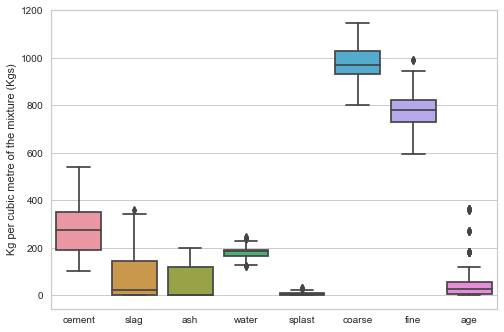

In [8]:
#TODO: add boxplot of features
plot = sns.boxplot(data = X)
plot.set(ylabel='Kg per cubic metre of the mixture (Kgs)')

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

Text(0.5, 1.0, 'Correlation heatmap of features')

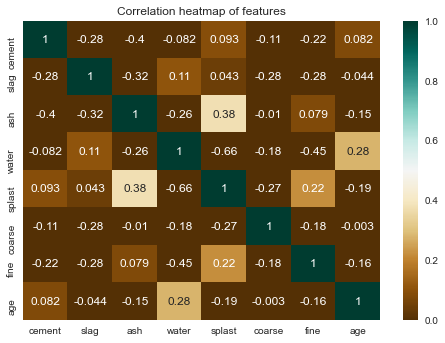

In [9]:
# TODO: add pairwise cross-correlation heatmap of features
corr = X.corr()
sns.heatmap(corr, vmax=1,vmin=0,annot=True,cmap='BrBG')
plt.title("Correlation heatmap of features")

### 2.5 Histogram of target variable 

It might be interesting to see how many examples of each target value we have available. The histogram of the target vector can visualize the distribution.

Using seaborn `distplot()`, plot the histogram of the target vector. Add a title.

Text(0, 0.5, 'Strength in MPA')

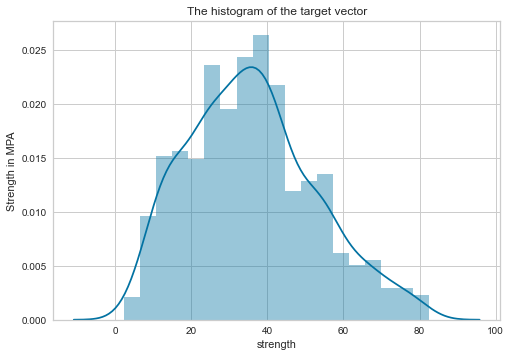

In [10]:
#TODO: Add histogram of targect vector
plt.figure()
sns.distplot(a = y, hist= True )
plt.title("The histogram of the target vector")
plt.ylabel("Strength in MPA")

## 3. Create training and test sets

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets.

In [11]:
# TODO: train-test split
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, y, random_state = 37, 
                                                    test_size = 0.2 )
    

## 4. Compare models using cross-validation

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list, compute the negative root mean-squared error using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [12]:
#TODO: Calling get_regressor_neg_rms() for each model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate





models = [LinearRegression(), RandomForestRegressor(random_state = 64), GradientBoostingRegressor(random_state = 79)]

for model in models:
   print('{} | {}'.format(model.__class__.__name__,get_regressor_neg_rms(model, X, y , cv = 7)))









LinearRegression | train_score = -10.27     test_score = -11.16     
RandomForestRegressor | train_score = -1.92     test_score = -7.28     
GradientBoostingRegressor | train_score = -3.75     test_score = -6.80     


### *Question 3:* For each of the three models, state if models are potentially over- or underfitting and why.

*LinearRegression : underfitting because the training and test values are very close*  

*RandomForestRegressor : overfitting because the training and test values are very far and trainig score is significantly more accurate*

*GradientBoostingRegressor : overfitting because the training and test values are very far and trainig score is significantly more accurate*



## 5. Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### 5.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [ 11, 13, 15, 17]`
- `'max_features': ['auto', 'log2', None]`


In [13]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [100, 200, 500],
             'max_depth': [11, 13, 15, 17],
             'max_features': ['auto', 'log2', None]}

grid = GridSearchCV(RandomForestRegressor(random_state=64), param_grid, cv=7,n_jobs=-1)

In [14]:
# TODO: perform the grid search by calling fit()

grid.fit(X_train, Y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(random_state=64), n_jobs=-1,
             param_grid={'max_depth': [11, 13, 15, 17],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [100, 200, 500]})

In [15]:
# TODO: Print the best parameters
grid.best_params_

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 200}

In [16]:
# TODO: Print the best score
grid.best_score_

0.9132536671711957

### 5.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [25]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)

from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [100, 200, 500],
             'max_depth': [1, 3, 5, 7],
             'learning_rate': [0.01, 0.1, 1.0]}

grid = GridSearchCV(GradientBoostingRegressor(random_state=79), param_grid, cv=7,n_jobs=-1)

In [26]:
# TODO: perform the grid search by calling fit()
grid.fit(X_train, Y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=79),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]})

In [27]:
# TODO: Print the best parameters
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [28]:
# TODO: Print the best score
grid.best_score_

0.935524801559439

### *Question 4:* Which of the two models produces the best score? What is the best score?

*GradientBoostingRegressor produces the best score which is 93.4%*


## 6. Retrain best model

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [29]:
#TODO: retrain the best estimator
model = grid.best_estimator_
model.fit(X_train, Y_train)


GradientBoostingRegressor(n_estimators=500, random_state=79)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and R-squared

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [30]:
# TODO: print rms and r-squared for training and test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



model.fit(X_train, Y_train)
ypred = model.predict(X_train)
ypred2 = model.predict(x_test)


print('RMSE for Training: {:.2f} '.format(mean_squared_error(Y_train,ypred, squared = False)))
print('RMSE for Test: {:.2f} '.format(mean_squared_error(y_test,ypred2, squared = False)))
print('R2 for Training: {:.2f} '.format(r2_score(Y_train, ypred)))
print('R2 for Test: {:.2f} '.format(r2_score(y_test, ypred2)))


RMSE for Training: 2.07 
RMSE for Test: 4.51 
R2 for Training: 0.98 
R2 for Test: 0.93 


### *Question 5:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models?

Polynomial regression (Training):  RMS error of 3.96 MPa and R2 = 0.89 
                      
                      testing:  RMS error of 8.82 MPa and R2 =  0.791
                      
 hence our model outperforms this becasue we have higher test scores and lower mean squared error
                      


neural network  (Training):  RMS error of 3.01 MPa and R2 = 0.940 
                      
                      (testing):  RMS error of  4.32  MPa and R2 =  0.929
                      
hence both performs similarly but Neural Network have less variance in R2 hence less overfitting more accurate

### 7.2 Predicted vs actual strength plot
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line.

Add x-axis, y-axis labels including units, and a title.


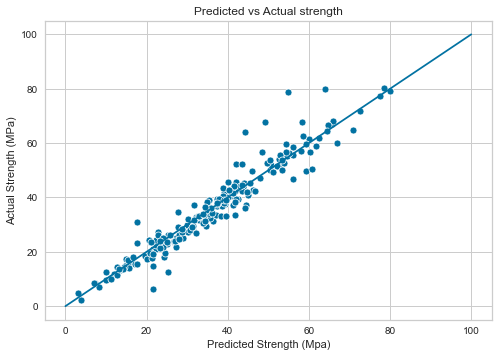

In [31]:
#TODO: predicted-actual plot
sns.scatterplot(x=ypred2, y=y_test)
plt.xlabel('Predicted Strength (Mpa)')
plt.title ('Predicted vs Actual strength')
plt.ylabel('Actual Strength (MPa)')
ax = np.linspace(0,100)
ay = ax
plt.plot(ax,ay)

### *Question 5:* For which two actual strength values (approximately) do we make the largest mistakes?

*Around 60 and 80*



### 7.3 Residual plot
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

Add x-axis, y-axis labels including units, and a title.



Text(0, 0.5, '(Actual-Predicted) Strength')

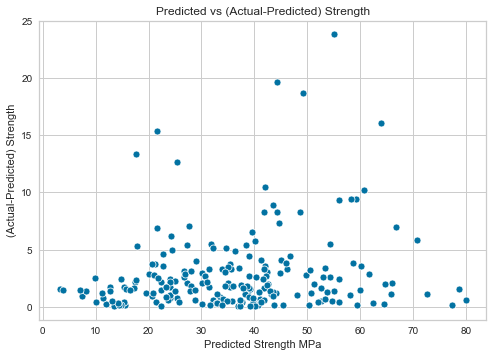

In [32]:
# TODO: Residual plot
sns.scatterplot(x=ypred2, y=abs(ypred2-y_test))

plt.title ('Predicted vs (Actual-Predicted) Strength')

plt.xlabel('Predicted Strength MPa')
plt.ylabel('(Actual-Predicted) Strength')

## 8. Conclusion

In conclusion, comment on the following items:
- Did we find a model that outperformes the polynomial regression reported in the reference article? Explain.



- Did we find a model that outperformes the neural network reported in the reference article? Explain.


- What was the assumption about the dataset and the reference article? How does this affect your conclusions?


* --> Yes we did. The values that we have achieved have less bias and variance that the values with polynomial Regression as we have higher test scores and lower mean squared errors 


* --> No we did not. The values that we have achieved for RMSE are better for training and similar for testing, we also achieved more variance for our R2 values hence we are close but Neural Network is better  


* --> We are asssuming that the same yellowbrick dataset has been used in both our analysis and in the algrithms in the article. This will completely change the results if the dataset used in the article has different values as the total analysis will be valueless if it is not. Also if more or less of the percentage of data has been used for testing that can also change the validity of our analyis

## 9. Reflection



*It was a fun experince getting to learn about hoe to actually implementing the things we  leanr in class to implement them and seein a results that are comparable to advanced systems like Neural nmetworking*